<a href="https://colab.research.google.com/github/AdityaG2005/PortfolioOptimization/blob/main/PortfolioOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#Description : This program helps to analyze and optimize a users portfolio using the Efficient Frontier

In [48]:
#Import python libraries

In [49]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [50]:
#Get FAANG tickers in portfolio
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [51]:
#Assign equal weights to stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [52]:
#Get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [53]:
#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2026-02-07'

In [54]:
#Create a dataframe to store the adjusted closing price of stocks
df = pd.DataFrame()

#Store the adjusted close price of stock into the df
for stock in assets:
  df[stock] = yf.download(stock, start = stockStartDate, end = today)['Close']

/tmp/ipython-input-1250640473.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock] = yf.download(stock, start = stockStartDate, end = today)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1250640473.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock] = yf.download(stock, start = stockStartDate, end = today)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1250640473.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock] = yf.download(stock, start = stockStartDate, end = today)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1250640473.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock] = yf.download(stock, start = stockStartDate, end = today)['Close']
[********************

In [55]:
#Show df with adjusted close values for each stock
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2025-06-26,39.543800,217.119995,200.577713,130.667007,174.160599
2025-06-27,39.879688,223.300003,200.657547,132.311996,177.994675
2025-06-30,40.102623,219.389999,204.738937,133.912994,177.116028
2025-07-01,40.023361,220.460007,207.383377,129.360001,176.636780
2025-07-02,39.880680,219.919998,211.993668,128.485992,179.482376
...,...,...,...,...,...
2026-02-02,42.262001,242.960007,270.010010,82.760002,344.899994
2026-02-03,42.258999,238.619995,269.480011,79.940002,340.700012
2026-02-04,42.153999,232.990005,276.489990,80.160004,333.339996


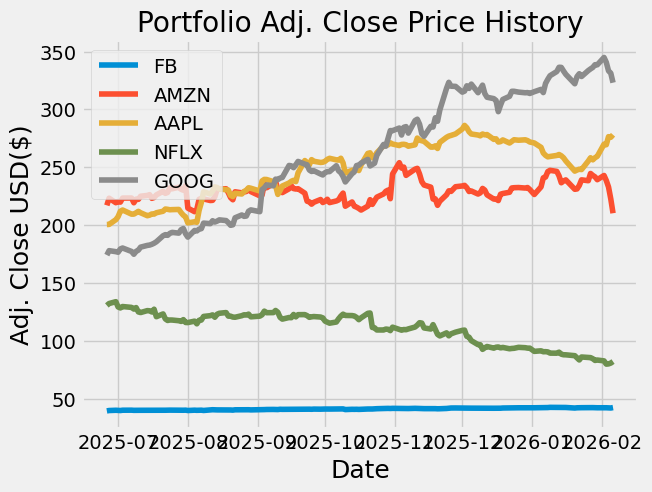

In [56]:
#Visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Close USD($)', fontsize = 18)
plt.legend(my_stocks.columns, loc = 'upper left')
plt.show()

In [57]:
#See the start and end date of adj. closing prices data
print(df.index.min())
print(df.index.max())



2025-06-26 00:00:00
2026-02-06 00:00:00


In [58]:
#Show daily simple returns
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2025-06-26,NaN,NaN,NaN,NaN,NaN
2025-06-27,0.008494,0.028464,0.000398,0.012589,0.022015
2025-06-30,0.005590,-0.017510,0.020340,0.012100,-0.004936
2025-07-01,-0.001976,0.004877,0.012916,-0.034000,-0.002706
2025-07-02,-0.003565,-0.002449,0.022231,-0.006756,0.016110
...,...,...,...,...,...
2026-02-02,0.000142,0.015295,0.040581,-0.008744,0.018817
2026-02-03,-0.000071,-0.017863,-0.001963,-0.034074,-0.012177
2026-02-04,-0.002485,-0.023594,0.026013,0.002752,-0.021603


In [59]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.002419,0.005935,0.003024,0.001604,0.004143
AMZN,0.005935,0.098475,0.016831,0.017308,0.026786
AAPL,0.003024,0.016831,0.047289,0.013767,0.020729
NFLX,0.001604,0.017308,0.013767,0.084766,0.004150
GOOG,0.004143,0.026786,0.020729,0.004150,0.070655


In [60]:
#Calculate portfolio variance-
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual,weights))
port_variance

np.float64(0.021286284187906058)

In [61]:
#Calculate portfolio volatility (Standard Deviation) / Risk
port_volatility = np.sqrt(port_variance)
port_volatility.item()


0.14589819802830348

In [62]:
#Calculate the annual portfolio return

In [63]:
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn.item()

0.19992378069411254

In [64]:
#Variance, Risk (SD), Return Together
percent_var = str(round(port_variance , 2) * 100) + '%'
percent_vol = str(round(port_volatility , 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn , 2) * 100) + '%'

print(percent_var)
print(percent_vol)
print(percent_ret)

2.0%
15.0%
20.0%


In [65]:
pip install PyPortfolioOpt


In [66]:
from pypfopt.efficient_frontier import EfficientFrontier  #class
from pypfopt import risk_models  #module
from pypfopt import expected_returns  #module

In [67]:
#Portfolio Optimization !!

#Calculate Expected Returns and annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)#Estimates the return each stock is expected to generate per year
S = risk_models.sample_cov(df)   #Covariance matrix (Risk)

#Optimize for Max Sharpe ratio
ef = EfficientFrontier(mu, S)  #Initializes the optimizer with:  Expected returns (μ), Covariance matrix (Σ)
weights = ef.max_sharpe()  #Finds portfolio weights for maximum sharpe ratio
cleaned_weights = ef.clean_weights()  #Cleans the above found weights : Rounds tiny weights to 0 and makes output readable
print(cleaned_weights)
ef.portfolio_performance(verbose = True)  #Prints Expected Annual return, Annual volatility,Sharpe ratio

OrderedDict({'FB': 0.1599, 'AMZN': 0.0, 'AAPL': 0.13715, 'NFLX': 0.0, 'GOOG': 0.70294})
Expected annual return: 133.2%
Annual volatility: 20.2%
Sharpe Ratio: 6.59


(np.float64(1.3324182284771655),
 np.float64(0.20229882906767271),
 np.float64(6.586386261442209))

In [68]:
0.1599 + 0.13715 + 0.70294

0.9999899999999999

In [69]:
from pypfopt.discrete_allocation import DiscreteAllocation , get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation , leftover = da.lp_portfolio()
print('Discrete Allocation : ' , allocation)
print('Leftover funds : ${:.2f}'.format(leftover) )

Discrete Allocation :  {'FB': 56, 'AAPL': 7, 'GOOG': 33}
Leftover funds : $15.34
